In [2]:
from pycaret.classification import *

import pandas as pd
import os
from pathlib import Path
import sys

try:
    del df
except:
    pass

dir = os.getcwd()
# go one level higher and add it to path
parent_dir = str(Path(dir).parents[0])
sys.path.append(parent_dir)

try:
    df = pd.read_csv('../data/interim/features.csv', index_col=0, header=[0, 1, 2])
    df = df.dropna()
except:
    pass

try:
    tf = pd.read_csv('../data/fma_metadata/tracks.csv', index_col=0, header=[0, 1, 2]).loc[df.index, ('track', 'genre_top')]
    tf.columns = ['genre']
except:
    pass

In [6]:
df.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2            -0.217359 -0.726509 -0.491446 -0.721771 -0.545604  0.903521   
5            -0.575293 -0.460787 -1.310206 -0.371414 -0.279014 -0.456130   
10           -0.170648 -0.662701  0.334679 -0.269012 -0.633766 -0.800806   
140          -0.286780  1.582875  0.664635  0.370429 -0.525093 -1.094748   
141           0.337887 -0.320074 -0.225522 -0.831719 -0.411882 -1.212733   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           0.786983  0.917156 -0.793144  0.452647  ...  0.102471  0.029637   
5          -0.788048  0.126617 -0.816839  3.057143  ...  0.111929  0.030867   
10         -0.514046 -0.019774 -0.477296 -0.710341  ...  0.061763  0.025627   
140         0.839174 -0.202234 -0.432132 -1.217938  ...  0.230628  0.069798   
141        -0.553260 -0.743021  0.849655  0.155225  ...  0.206765  0.094507   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.037667   3.497484  0.416504  0.098364  0.078613  0.006348   
5           0.027787   6.152944  0.320801  0.059334  0.047852  0.002930   
10          0.040977   2.130515  0.188477  0.080989  0.079102  0.025391   
140         0.086410  18.313331  0.353027  0.027256  0.014648  0.000000   
141         0.057883  34.329093  0.330566  0.034120  0.025879  0.000000   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           1.825834  0.068405  
5           2.090861  0.047795  
10          0.901178  0.020855  
140         3.911634  0.037715  
141         5.081770  0.033770  

[5 rows x 518 columns]

In [10]:
tf.head()

,genre
track_id,
2,Hip-Hop
5,Hip-Hop
10,Pop
140,Folk
141,Folk


In [13]:
df.columns=[str(x) for x in list(range(1,519))]

In [14]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,509,510,511,512,513,514,515,516,517,518
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.217359,-0.726509,-0.491446,-0.721771,-0.545604,0.903521,0.786983,0.917156,-0.793144,0.452647,...,0.102471,0.029637,0.037667,3.497484,0.416504,0.098364,0.078613,0.006348,1.825834,0.068405
5,-0.575293,-0.460787,-1.310206,-0.371414,-0.279014,-0.456130,-0.788048,0.126617,-0.816839,3.057143,...,0.111929,0.030867,0.027787,6.152944,0.320801,0.059334,0.047852,0.002930,2.090861,0.047795
10,-0.170648,-0.662701,0.334679,-0.269012,-0.633766,-0.800806,-0.514046,-0.019774,-0.477296,-0.710341,...,0.061763,0.025627,0.040977,2.130515,0.188477,0.080989,0.079102,0.025391,0.901178,0.020855
140,-0.286780,1.582875,0.664635,0.370429,-0.525093,-1.094748,0.839174,-0.202234,-0.432132,-1.217938,...,0.230628,0.069798,0.086410,18.313331,0.353027,0.027256,0.014648,0.000000,3.911634,0.037715
141,0.337887,-0.320074,-0.225522,-0.831719,-0.411882,-1.212733,-0.553260,-0.743021,0.849655,0.155225,...,0.206765,0.094507,0.057883,34.329093,0.330566,0.034120,0.025879,0.000000,5.081770,0.033770


In [15]:
total_df = pd.merge(df,tf,how='inner',left_index=True, right_index=True)

In [16]:
total_df.head()

,1,2,3,4,5,6,7,8,9,10,...,510,511,512,513,514,515,516,517,518,genre
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.217359,-0.726509,-0.491446,-0.721771,-0.545604,0.903521,0.786983,0.917156,-0.793144,0.452647,...,0.029637,0.037667,3.497484,0.416504,0.098364,0.078613,0.006348,1.825834,0.068405,Hip-Hop
5,-0.575293,-0.460787,-1.310206,-0.371414,-0.279014,-0.456130,-0.788048,0.126617,-0.816839,3.057143,...,0.030867,0.027787,6.152944,0.320801,0.059334,0.047852,0.002930,2.090861,0.047795,Hip-Hop
10,-0.170648,-0.662701,0.334679,-0.269012,-0.633766,-0.800806,-0.514046,-0.019774,-0.477296,-0.710341,...,0.025627,0.040977,2.130515,0.188477,0.080989,0.079102,0.025391,0.901178,0.020855,Pop
140,-0.286780,1.582875,0.664635,0.370429,-0.525093,-1.094748,0.839174,-0.202234,-0.432132,-1.217938,...,0.069798,0.086410,18.313331,0.353027,0.027256,0.014648,0.000000,3.911634,0.037715,Folk
141,0.337887,-0.320074,-0.225522,-0.831719,-0.411882,-1.212733,-0.553260,-0.743021,0.849655,0.155225,...,0.094507,0.057883,34.329093,0.330566,0.034120,0.025879,0.000000,5.081770,0.033770,Folk


In [18]:
set(total_df.genre)

{'Electronic',
 'Experimental',
 'Folk',
 'Hip-Hop',
 'Instrumental',
 'International',
 'Pop',
 'Rock'}

In [19]:
clf = setup(data=total_df, target='genre', fold=3,
            data_split_shuffle=True, data_split_stratify=True,
            normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,6279
1,Target,genre
2,Target type,Multiclass
3,Target mapping,"Electronic: 0, Experimental: 1, Folk: 2, Hip-Hop: 3, Instrumental: 4, International: 5, Pop: 6, Rock: 7"
4,Original data shape,"(7951, 519)"
5,Transformed data shape,"(7951, 519)"
6,Transformed train set shape,"(5565, 519)"
7,Transformed test set shape,"(2386, 519)"
8,Numeric features,518
9,Preprocess,True


In [20]:
best = compare_models(exclude = ['lightgbm'])
# 40 mins fitting, 12 mins compiling

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.5572,0.8787,0.5572,0.5498,0.5500,0.4939,0.4949,620.2900
xgboost,Extreme Gradient Boosting,0.5393,0.8672,0.5393,0.5332,0.5331,0.4734,0.4742,33.8433
lr,Logistic Regression,0.5296,0.8554,0.5296,0.5208,0.5225,0.4623,0.4630,9.8000
gbc,Gradient Boosting Classifier,0.5206,0.8566,0.5206,0.5178,0.5169,0.4520,0.4526,125.8500
lda,Linear Discriminant Analysis,0.5055,0.8404,0.5055,0.5062,0.5037,0.4348,0.4353,0.4333
rf,Random Forest Classifier,0.5019,0.8462,0.5019,0.4944,0.4894,0.4307,0.4327,1.7433
et,Extra Trees Classifier,0.5019,0.8420,0.5019,0.4983,0.4883,0.4306,0.4333,1.0633
svm,SVM - Linear Kernel,0.4428,0.0000,0.4428,0.5220,0.4119,0.3631,0.3799,1.8467
knn,K Neighbors Classifier,0.4363,0.7650,0.4363,0.4349,0.4242,0.3557,0.3581,2.1267
ada,Ada Boost Classifier,0.4052,0.7529,0.4052,0.3849,0.3853,0.3201,0.3226,3.9900


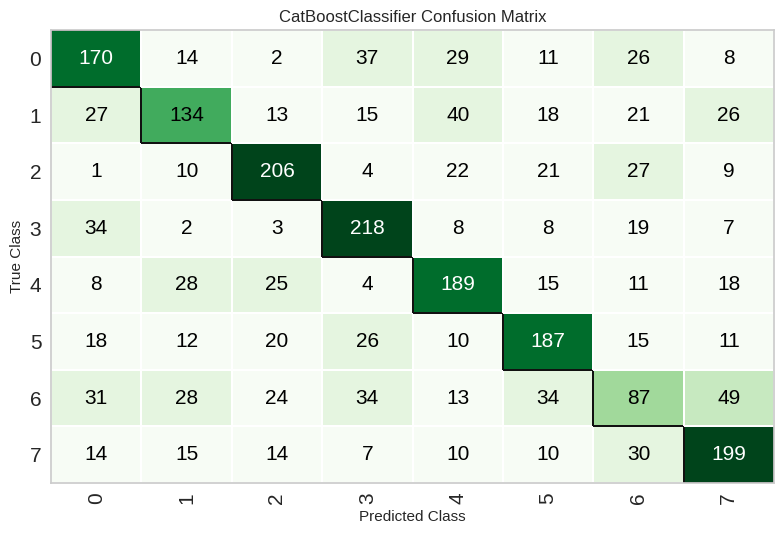

In [21]:
plot_model(best, plot = 'confusion_matrix')
# это на тестовых данных, где по 300 треков каждого стиля

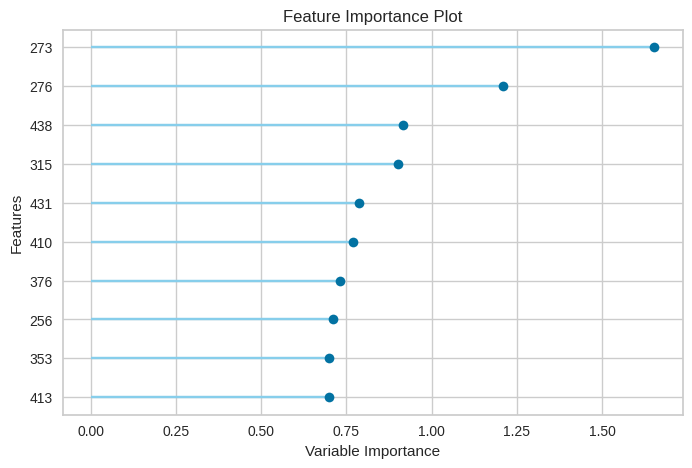

In [22]:
plot_model(best, plot='feature')

In [23]:
feat_df = pd.DataFrame({'importance':list(best.feature_importances_),
              'index':list(total_df.columns)[:-1]})

In [24]:
feat_df.sort_values('importance', ascending=False)

,importance,index
272,1.654070,273
275,1.209021,276
437,0.915243,438
314,0.900559,315
430,0.786669,431
...,...,...
104,0.000062,105
96,0.000000,97
184,0.000000,185
102,0.000000,103


In [25]:
feat_df.describe()

,importance
count,518.000000
mean,0.193050
std,0.172969
min,0.000000
25%,0.084825
50%,0.152948
75%,0.238844
max,1.654070


In [26]:
new_col = feat_df.query('importance>=0.5').index

<AxesSubplot:ylabel='Frequency'>

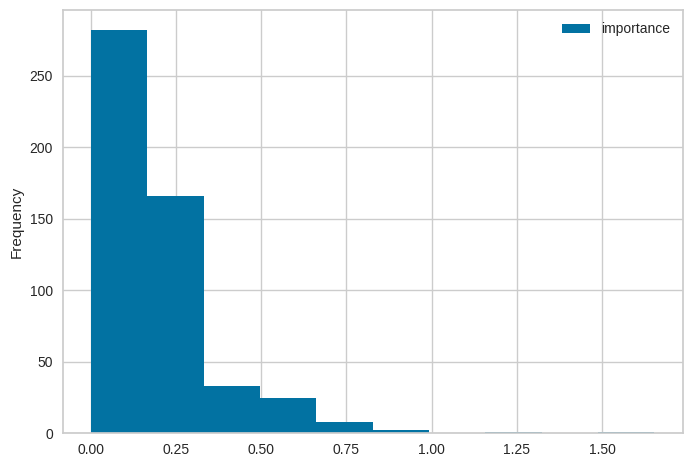

In [28]:
feat_df.plot.hist()

In [27]:
new_col 

Int64Index([143, 248, 255, 272, 275, 277, 296, 314, 332, 334, 336, 352, 353,
            372, 373, 375, 377, 379, 396, 397, 398, 403, 409, 412, 428, 430,
            436, 437, 438, 446, 448, 455, 461, 464, 511, 516],
           dtype='int64')

In [29]:
clf = setup(data=total_df.iloc[:,list(new_col)+[-1]], target='genre', fold=3,
            data_split_shuffle=True, data_split_stratify=True,
            normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,365
1,Target,genre
2,Target type,Multiclass
3,Target mapping,"Electronic: 0, Experimental: 1, Folk: 2, Hip-Hop: 3, Instrumental: 4, International: 5, Pop: 6, Rock: 7"
4,Original data shape,"(7951, 37)"
5,Transformed data shape,"(7951, 37)"
6,Transformed train set shape,"(5565, 37)"
7,Transformed test set shape,"(2386, 37)"
8,Numeric features,36
9,Preprocess,True


In [30]:
best = compare_models(include = ['gbc','lr','catboost','xgboost'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:35:09
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.5355,0.8650,0.5355,0.5294,0.5299,0.4691,0.4698,54.3567
xgboost,Extreme Gradient Boosting,0.5283,0.8544,0.5283,0.5246,0.5248,0.4609,0.4613,3.3733
gbc,Gradient Boosting Classifier,0.5017,0.8444,0.5017,0.4973,0.4959,0.4305,0.4313,11.5833
lr,Logistic Regression,0.4670,0.8202,0.4670,0.4503,0.4486,0.3908,0.3934,1.2033


In [32]:
best.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MultiClass',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'class_names': [0, 1, 2, 3, 4, 5, 6, 7],
 'random_seed': 365,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_

In [33]:
best_2 = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5181,0.8519,0.5181,0.5166,0.5151,0.4491,0.4497
1,0.5385,0.8555,0.5385,0.5336,0.5351,0.4726,0.4729
2,0.5283,0.8558,0.5283,0.5236,0.5242,0.4609,0.4614
Mean,0.5283,0.8544,0.5283,0.5246,0.5248,0.4609,0.4613
Std,0.0084,0.0018,0.0084,0.0070,0.0082,0.0096,0.0095


In [35]:
best_2.get_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 365,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': 0}

## future optimization

In [3]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import numpy as np
import time
import copy
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

def make_pipeline(scaler, classifier):
    return Pipeline([
            ('scaler', scaler),
            ('classifier', classifier)
        ])

def make_estimator(classifier, scaler, params_grid, scorer, data, labels):
    cross_val = StratifiedKFold(n_splits=3)
    pipeline = make_pipeline(scaler, classifier)
    grid_cv = RandomizedSearchCV(pipeline, params_grid, scoring=scorer, cv=cross_val, random_state=777, n_iter=2)
    grid_cv.fit(data, labels)
    return grid_cv

In [6]:
#X = total_df.iloc[:,list(new_col)]
X = total_df.iloc[:,:-1]
y = total_df.iloc[:,-1]

In [7]:
results = pd.DataFrame(columns=['clf', 'score', 'time', 'params'])
for name, clf, params_grid in [
                    ('RandomForest', RandomForestRegressor,
                {'regressor__n_estimators': np.arange(10, 200, 30), # default 100
                'regressor__max_depth': np.arange(1, 30, 1).tolist()+[None], # default None
                'regressor__min_samples_split': np.arange(2, 6, 1), # default 2
                'regressor__min_samples_leaf': [1, 2, 3], # default 1
                'regressor__max_features': [1, 'sqrt', 'log2'], # default 1
                'regressor__min_impurity_decrease': np.logspace(-10, -6, 5).tolist()+[0]}), # default 0

                    ('GradientBoosting', GradientBoostingRegressor,
                {'regressor__n_estimators': np.arange(10, 200, 30), # default 100
                'regressor__max_depth': np.arange(1, 10, 1).tolist()+[None], # default 3
                'regressor__min_samples_split': np.arange(2, 6, 1), # default 2
                'regressor__max_features': [None, 'sqrt', 'log2'], # default None
                'regressor__subsample': np.arange(0.5, 1, 0.1)}), # default 1

                    ('XGBoost', XGBRegressor,
                {'regressor__learning_rate':np.arange(0.1,0.5,0.1), # default 0.3
                 'regressor__max_depth':range(1,10), # default 6
                 'regressor__n_estimators':np.arange(10, 200, 30), # default 100
                 'regressor__min_child_weight':range(1,5)}), # default 1
    
                    ('CatBoost', CatBoostRegressor,
                {'regressor__learning_rate': [0.001, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3], # default 0.03
                 'regressor__iterations': range(10,1500,100), # default 1000
                 'regressor__depth': range(1,15,5), # default 6
                 'regressor__logging_level': ['Silent']})
                ]:
    
    
    
    
    start_time = time.time()
    
    grid_search = make_estimator(clf(random_state=777), MinMaxScaler(),
                                    params_grid, 'accuracy', X, y)
    
    elapsed_time = time.time() - start_time

    results.loc[len(results)] = [name, 
                                 grid_search.best_score_, 
                                 time.strftime("%H:%M:%S", time.gmtime(elapsed_time)), 
                                 grid_search.best_params_]
    
results['score'] = results['score'].map('{:,.3f}'.format)
results_trees = copy.deepcopy(results)
results_trees.sort_values(by='score', ascending=False)

KeyboardInterrupt: 

In [ ]:
results_trees.sort_values(by='score', ascending=False)

In [ ]:

import lime
import shap

